In [349]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import json
import seaborn as sns

In [350]:
import warnings
warnings.filterwarnings('ignore')

In [351]:
def save_json(name, data):
    with open(name, "w") as f:
         json.dump(data, f)
    print("done.")

In [352]:
def load_json(name, data=None):
    with open(name, "r") as f:
         data = json.load(f)
    return data

In [353]:
SGI = pd.read_csv("./interactions/interactome.csv")
I = pd.read_csv("./interactions/intersection_interactome.csv")
U = pd.read_csv("./interactions/union_interactome.csv")

In [354]:
SGI.head()

,SYMBOL_A,UNIPROT_AC_A,INTERACTION_TYPE,SYMBOL_B,UNIPROT_AC_B,SOURCE
0,STAT3,P40763,physical,STAT1,P42224,BIOGRID
1,EIF2AK2,P19525,physical,STAT1,P42224,BIOGRID
2,LMNA,P02545,physical,RBBP4,Q09028,BIOGRID
3,ITGAV,P06756,physical,STAT1,P42224,BIOGRID
4,MAP3K8,P41279,physical,MAP2K4,P45985,BIOGRID


In [355]:
U.head()

,SYMBOL_A,UNIPROT_AC_A,INTERACTION_TYPE,SYMBOL_B,UNIPROT_AC_B,SOURCE
0,ABI1,A0A0A0MRT6,physical,ENAH,Q8N8S7,BIOGRID
1,CUL7,Q14999,physical,SKP1,P63208,BIOGRID
2,SUV39H1,O43463,physical,RBBP4,Q09028,BIOGRID
3,LMNA,P02545,physical,PMS2,B4DGM0,BIOGRID
4,NASP,P49321,physical,RBBP4,Q09028,BIOGRID


In [356]:
I.head()

,SYMBOL_A,UNIPROT_AC_A,INTERACTION_TYPE,SYMBOL_B,UNIPROT_AC_B,SOURCE
0,CALR,P27797,NaN,K1C17,Q04695,APID
1,CALR,P27797,NaN,MARE3,Q9UPY8,APID
2,CALR,P27797,NaN,PERF,P14222,APID
3,CALR,P27797,NaN,VWF,P04275,APID
4,CALR,P27797,NaN,CALX,P27824,APID


In [357]:
def generate_graph(seed):
    G_seed = nx.from_pandas_dataframe(seed, 'UNIPROT_AC_A', 'UNIPROT_AC_B')
    return G_seed

In [358]:
G_SGI = generate_graph(SGI)
G_I = generate_graph(I)
G_U = generate_graph(U)

In [359]:
p_sgi=nx.spring_layout(G_SGI)

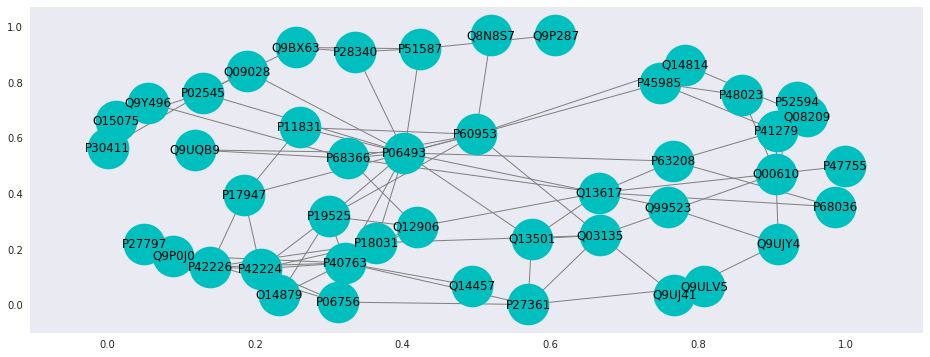

In [360]:
#sns.set()
plt.figure(figsize=(16, 6))
nx.draw_networkx(G_SGI, pos=p_sgi, edge_color="grey", node_color="c", node_size=1000, linewidths=10)
plt.grid()
plt.show()

In [391]:
p_i=nx.spring_layout(G_I)

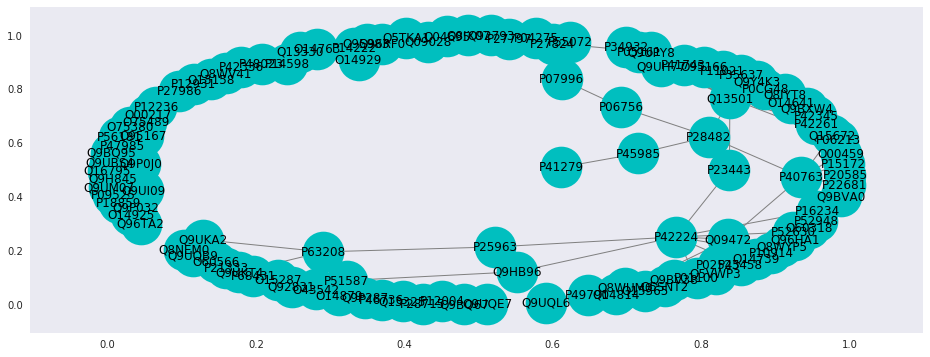

In [392]:
#sns.set()
plt.figure(figsize=(16, 6))
nx.draw_networkx(G_I, pos=p_i, edge_color="grey", node_color="c", node_size=1000, linewidths=10)
plt.grid()
plt.show()

# 1.1

In [363]:
properties_I={}

# N. of nodes and links

In [364]:
def n_nodes_edges(graph):
    n_nodes=nx.number_of_nodes(graph)
    n_edges=nx.number_of_edges(graph)
    print("n nodes: ", n_nodes)
    print("n edges: ", n_edges)
    return n_nodes, n_edges

In [365]:
n_nodes, n_edges = n_nodes_edges(G_SGI)

n nodes:  45
n edges:  80


In [366]:
n_nodes, n_edges = n_nodes_edges(G_I)

n nodes:  114
n edges:  105


In [367]:
properties_I["n_nodes"] = n_nodes
properties_I["n_edges"] = n_edges

In [368]:
n_nodes, n_edges = n_nodes_edges(G_U)

n nodes:  8233
n edges:  16603


# N. of connected components

In [369]:
print(nx.number_connected_components(G_SGI))

1


In [370]:
print(nx.number_connected_components(G_I))

10


In [371]:
properties_I["n_connected_components"] = nx.number_connected_components(G_I)

In [372]:
print(nx.number_connected_components(G_U))

1


# N. of isolated nodes

In [373]:
print(len(nx.isolates(G_SGI)))
print(len(nx.isolates(G_I)))
print(len(nx.isolates(G_U)))

0
0
0


In [192]:
properties_I["n_isolated_nodes"] = nx.isolates(G_I)

# Average path length

In [100]:
def average_path_length(G):
    '''
    compute the average path length for every sub-connected component
    '''
    apl=[]
    for g in nx.connected_component_subgraphs(G):
        apl.append(nx.average_shortest_path_length(g)) 
    return apl

In [377]:
apl_SGI=average_path_length(G_SGI)

In [378]:
apl_SGI

[2.9909090909090907]

In [103]:
apl_I=average_path_length(G_I)

In [187]:
apl_I

[4.155835080363382,
 1.75,
 1.875,
 1.8333333333333333,
 1.3333333333333333,
 1.0,
 1.6666666666666667,
 1.7777777777777777,
 1.0,
 1.0]

In [193]:
properties_I["average_path_length"] = apl_I

In [105]:
apl_U=average_path_length(G_U)

In [106]:
apl_U

[3.6565403415596265]

# Average degree

In [125]:
# def average_degree_connectivity(G):
#     '''
#     compute the average degree connectivity for every sub-connected component
#     '''
#     adc=[]
#     for g in nx.connected_component_subgraphs(G):
#         adc.append(nx.average_degree_connectivity(g)) 
#     return adc

In [379]:
adc_SGI=nx.average_degree_connectivity(G_SGI)

In [380]:
adc_SGI

{1: 5.75,
 2: 6.785714285714286,
 3: 5.416666666666667,
 4: 6.25,
 5: 4.666666666666667,
 6: 6.266666666666667,
 7: 4.0,
 8: 5.5,
 9: 5.0,
 14: 4.571428571428571}

In [129]:
adc_I=nx.average_degree_connectivity(G_I)

In [194]:
properties_I["average_degree"] = adc_I

In [131]:
adc_U=nx.average_degree_connectivity(G_U)

In [132]:
adc_U

{1: 372.67356828193834,
 2: 415.6418060200669,
 3: 458.11586901763224,
 4: 432.1938271604938,
 5: 436.1319587628866,
 6: 431.1546762589928,
 7: 420.96515679442507,
 8: 378.8775,
 9: 394.11555555555555,
 10: 403.6625,
 11: 400.8939393939394,
 12: 452.43939393939394,
 13: 375.75524475524475,
 14: 397.6,
 15: 373.35555555555555,
 16: 289.78125,
 17: 325.0686274509804,
 18: 362.56481481481484,
 19: 326.7894736842105,
 20: 330.45,
 21: 345.35714285714283,
 22: 340.6818181818182,
 24: 5.0,
 25: 2.2,
 26: 15.26923076923077,
 27: 3.0,
 28: 2.2857142857142856,
 29: 12.413793103448276,
 30: 3.7,
 32: 10.625,
 34: 3.4411764705882355,
 35: 2.5142857142857142,
 39: 3.3076923076923075,
 40: 3.75,
 48: 2.8958333333333335,
 49: 2.4489795918367347,
 51: 42.27450980392157,
 65: 4.446153846153846,
 74: 17.31081081081081,
 78: 15.012820512820513,
 85: 7.188235294117647,
 87: 5.931034482758621,
 88: 7.840909090909091,
 97: 1.9793814432989691,
 104: 14.057692307692308,
 115: 12.252173913043478,
 118: 17.203

# Average clustering coeff

In [133]:
def average_clustering_coeff(G):
    '''
    compute the clustering coeff for every sub-connected component
    '''
    acc=[]
    for g in nx.connected_component_subgraphs(G):
        acc.append(nx.average_clustering(g)) 
    return acc

In [381]:
acc_SGI=average_clustering_coeff(G_SGI)

In [382]:
acc_SGI

[0.20220051553384885]

In [136]:
acc_I=average_clustering_coeff(G_I)

In [195]:
properties_I["average_clustering_coeff"] = acc_I

In [138]:
acc_U=average_clustering_coeff(G_U)

In [139]:
acc_U

[0.13593630274585294]

# Network diameter & radius

In [196]:
def compute_distance_measures(G):
    D=[]
    R=[]
    '''compute diameter and radius for every sub-connected graph'''
    for g in nx.connected_component_subgraphs(G):
        d=nx.diameter(g)
        r=nx.radius(g)
        D.append(d)
        R.append(r)
        print("diameter: ", d)
        print("radius: ", r)
        print()
    return D, R

In [383]:
compute_distance_measures(G_SGI)

diameter:  6
radius:  4



([6], [4])

In [384]:
D_I, R_I = compute_distance_measures(G_I)

diameter:  2
radius:  1

diameter:  2
radius:  1

diameter:  9
radius:  5

diameter:  2
radius:  1

diameter:  2
radius:  1

diameter:  2
radius:  1

diameter:  2
radius:  1

diameter:  1
radius:  1

diameter:  1
radius:  1

diameter:  1
radius:  1



In [198]:
properties_I["diameter"] = D_I
properties_I["radius"] = R_I

In [35]:
compute_distance_measures(G_I)

diameter:  9
radius:  5

diameter:  2
radius:  1

diameter:  2
radius:  1

diameter:  2
radius:  1

diameter:  2
radius:  1

diameter:  1
radius:  1

diameter:  1
radius:  1

diameter:  1
radius:  1

diameter:  2
radius:  1

diameter:  2
radius:  1



In [36]:
compute_distance_measures(G_U)

diameter:  7
radius:  4



# Centralization ([Freeman centralization](https://en.wikipedia.org/wiki/Centrality#Freeman_Centralization))

In [142]:
def freeman_centralization(G):
    n=G.number_of_nodes()
    centralities=nx.degree_centrality(G).values()
    max_degree=max(centralities)
    sum_degree=sum(centralities)
    centralization=(n*max_degree - sum_degree)/ (n-1)**2
    return centralization

In [385]:
freeman_centralization(G_SGI)

0.005517468069120962

In [386]:
properties_I["centralization"] = freeman_centralization(G_I)

In [145]:
freeman_centralization(G_U)

1.5929144813985127e-05

# 1.2

In [387]:
def global_properties(G):
    n_nodes=nx.number_of_nodes(G)
    n_edges=nx.number_of_edges(G)
    apl=nx.average_shortest_path_length(G)
    adc=nx.average_degree_connectivity(G)
    acc=nx.average_clustering(G)
    d=nx.diameter(G)
    r=nx.radius(G)
    c=freeman_centralization(G)
    res = {"n_nodes": n_nodes, "n_edges": n_edges, 
           "average path length": apl, "average degree connectivity": adc, "average clustering connectivity": acc, 
          "diameter": d, "radius": r, "centralization": c}
    return res

In [45]:
def print_global(res):
    for k in res:
        print(k + ":", res[k])

In [147]:
LCC_SGI = max(nx.connected_component_subgraphs(G_SGI), key=len)
#print(print_global(global_properties(LCC_SGI)))

In [148]:
gp_SGI=global_properties(LCC_SGI)

In [388]:
LCC_I = max(nx.connected_component_subgraphs(G_I), key=len)
#print(print_global(global_properties(LCC_I)))

In [389]:
gp_I=global_properties(LCC_I)

In [151]:
LCC_U = max(nx.connected_component_subgraphs(G_U), key=len)

In [ ]:
#print(print_global(global_properties(LCC_U)))

In [152]:
gp_U = global_properties(LCC_U)

In [390]:
gp_I

{'average clustering connectivity': 0.0,
 'average degree connectivity': {1: 11.45,
  2: 6.142857142857143,
  3: 3.5,
  4: 6.75,
  6: 1.8333333333333333,
  9: 1.5555555555555556,
  12: 1.1666666666666667,
  17: 1.2352941176470589},
 'average path length': 4.155835080363382,
 'centralization': 0.0054407329540493155,
 'diameter': 9,
 'n_edges': 54,
 'n_nodes': 54,
 'radius': 5}

In [154]:
def local_properties(G, flag=False):
    dc= nx.degree_centrality(G)
    bc= nx.betweenness_centrality(G)
    cc= nx.closeness_centrality(G)
    ec= nx.eigenvector_centrality_numpy(G)
    ratio= {k: bc[k]/dc[k] for k in dc}
    
    res= {"degree centrality": dc, "betweenness centrality": bc, "closeness centrality": cc, "eigenvalues centrality": ec, 
          "ratio": ratio}
    return res

In [155]:
lp_SGI=local_properties(LCC_SGI)

In [156]:
lp_I=local_properties(LCC_I)

In [157]:
lp_U=local_properties(LCC_U)

## 2

In [159]:
graph_properties={"gp_SGI":gp_SGI, "gp_I":gp_I, "gp_U":gp_U, 
                 "lp_SGI":lp_SGI, "lp_I":lp_I, "lp_U":lp_U}

### create tables

In [ ]:
def f_average_degree(gp_SGI):
    average_degree=0
    for k in gp_SGI["average degree connectivity"]:
        average_degree += k*gp_SGI["average degree connectivity"][k]

        average_degree = average_degree / gp_SGI["n_nodes"]
    return average_degree

In [178]:
def print_properties(gp_SGI):
    for k in gp_SGI:
        print(k)
        print(gp_SGI[k])
    return None

In [179]:
print_properties(gp_I)

n_edges
54
diameter
9
centralization
0.0054407329540493155
average degree connectivity
{1: 11.45, 2: 6.142857142857143, 3: 3.5, 4: 6.75, 6: 1.8333333333333333, 17: 1.2352941176470589, 9: 1.5555555555555556, 12: 1.1666666666666667}
average clustering connectivity
0.0
radius
5
average path length
4.155835080363382
n_nodes
54


In [184]:
columns_global=["n_nodes", "n_edges", "n_connected_components", "n_isolated_nodes", "average_path_length", 
         "average_degree", "average_clustering_coeff", "diameter", "radius", "centralization"]

In [200]:
index_global=[ "LCC-I", "SGI", "I", "U"]

In [215]:
properties_I["average degree connectivity"] = properties_I["average_degree"]

In [222]:
f_average_degree(gp_I)

0.26419507335717796

In [339]:
nx.degree_centrality(LCC_I)

{'BCCIP': 0.03773584905660377,
 'BRCA2': 0.22641509433962265,
 'BRCC3': 0.018867924528301886,
 'BUB1B': 0.018867924528301886,
 'CBL': 0.018867924528301886,
 'DVL2': 0.018867924528301886,
 'EP300': 0.05660377358490566,
 'ERCC5': 0.018867924528301886,
 'FANCE': 0.03773584905660377,
 'FANCG': 0.018867924528301886,
 'FBX5': 0.018867924528301886,
 'FBXL4': 0.018867924528301886,
 'FLNA': 0.018867924528301886,
 'FOS': 0.018867924528301886,
 'FUS': 0.018867924528301886,
 'GBRAP': 0.018867924528301886,
 'GRIA1': 0.018867924528301886,
 'GRP78': 0.018867924528301886,
 'GRWD1': 0.018867924528301886,
 'HDAC5': 0.018867924528301886,
 'HSP74': 0.018867924528301886,
 'IKBA': 0.03773584905660377,
 'INSR': 0.018867924528301886,
 'IRF1': 0.018867924528301886,
 'ISG15': 0.018867924528301886,
 'ITAV': 0.03773584905660377,
 'JAK1': 0.018867924528301886,
 'KAT2B': 0.018867924528301886,
 'KLHL3': 0.018867924528301886,
 'KPCI': 0.018867924528301886,
 'KS6B1': 0.03773584905660377,
 'M3K8': 0.018867924528301886,

In [338]:
LCC_I.degree()

{'BCCIP': 2,
 'BRCA2': 12,
 'BRCC3': 1,
 'BUB1B': 1,
 'CBL': 1,
 'DVL2': 1,
 'EP300': 3,
 'ERCC5': 1,
 'FANCE': 2,
 'FANCG': 1,
 'FBX5': 1,
 'FBXL4': 1,
 'FLNA': 1,
 'FOS': 1,
 'FUS': 1,
 'GBRAP': 1,
 'GRIA1': 1,
 'GRP78': 1,
 'GRWD1': 1,
 'HDAC5': 1,
 'HSP74': 1,
 'IKBA': 2,
 'INSR': 1,
 'IRF1': 1,
 'ISG15': 1,
 'ITAV': 2,
 'JAK1': 1,
 'KAT2B': 1,
 'KLHL3': 1,
 'KPCI': 1,
 'KS6B1': 2,
 'M3K8': 1,
 'MCPH1': 1,
 'MEF2D': 2,
 'MK01': 4,
 'MLP3C': 1,
 'MP2K4': 2,
 'MTOR': 1,
 'MYOD1': 1,
 'P85B': 1,
 'PCNA': 1,
 'PGFRA': 1,
 'SKP1': 3,
 'SMC3': 1,
 'SQSTM': 17,
 'STAT1': 9,
 'STAT2': 1,
 'STAT3': 6,
 'TRAF6': 1,
 'TSP1': 1,
 'TWST1': 1,
 'UBC': 1,
 'ULK2': 1,
 'XRCC3': 1}

## local tables

In [325]:
def generate_local_table(lp_SGI):
    list_sgi=[(k, lp_SGI["betweenness centrality"][k]) for k in lp_SGI["betweenness centrality"]]
    list_sgi = sorted(list_sgi, key=lambda u:u[1], reverse=True)
    
    list_sgi2=[(k, lp_SGI["degree centrality"][k]) for k in lp_SGI["degree centrality"]]
    list_sgi2 = sorted(list_sgi2, key=lambda u:u[1], reverse=True)
    
    genes_index=[]
    for i in range(20):
        if list_sgi[i][1] != 0.0: 
            genes_index.append(list_sgi[i][0])
        else:
            genes_index.append(list_sgi2[i][0])
        
    lp = {k:[] for k in lp_SGI.keys()}
    
    cols=lp_SGI.keys()
    for i in genes_index:
        for k in cols:
            lp[k].append(lp_SGI[k][i])
            
    lp = pd.DataFrame(lp, index=genes_index, columns=["betweenness centrality", "degree centrality", 
                                                              "closeness centrality", "eigenvalues centrality", "ratio"])
    return lp

In [342]:
def normalization_routine(lp):
    for k in lp:
        if k not in ["ratio"]:
            index=[]
            values=[]
            for i in lp[k]:
                index.append(i)
                values.append(lp[k][i])
            
            values=np.array(values)
            m = max(values)
            values=values / m
            d={}
            for i in range(len(values)):
                d[index[i]] = values[i]

            lp[k] = d.copy()
    return lp

In [332]:
graph_properties = load_json("./graph_properties/graph_properties.json")

In [335]:
lp_I= graph_properties["lp_I"]

In [336]:
lp_U= graph_properties["lp_U"]

In [343]:
lp_I=normalization_routine(lp_I)
lp_U=normalization_routine(lp_U)

In [344]:
lp_i = generate_local_table(lp_I)
lp_u = generate_local_table(lp_U)

In [348]:
lp_i

,betweenness centrality,degree centrality,closeness centrality,eigenvalues centrality,ratio
STAT1,1.000000,0.529412,1.000000,0.138775,3.741453
SQSTM,0.848087,1.000000,0.922581,1.000000,1.679864
BRCA2,0.636208,0.705882,0.725888,0.025952,1.785256
FANCE,0.593946,0.117647,0.846154,0.039481,10.000000
KS6B1,0.534552,0.117647,0.934641,0.272935,9.000000
MK01,0.350086,0.235294,0.781421,0.304284,2.947115
STAT3,0.343804,0.352941,0.826590,0.114827,1.929487
EP300,0.324957,0.176471,0.836257,0.064726,3.647436
IKBA,0.171331,0.117647,0.756614,0.035569,2.884615
SKP1,0.117647,0.176471,0.603376,0.009632,1.320513
